In [1]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 7                                               #
#                                                            #
##############################################################

from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
import os


# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.

dataset_path = './intermediate_datafiles/ourdata/'
export_tree_path = 'Example_graphs/Chapter7/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

if not os.path.exists(export_tree_path):
    os.makedirs(export_tree_path)

dataset.index = dataset.index.to_datetime()



C:\Users\zdujmic\AppData\Local\Continuum\Anaconda2\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [2]:
# Let us consider our first task, namely the prediction of the label. We consider this as a non-temporal task.

# We create a single column with the categorical attribute representing our class. Furthermore, we use 70% of our data
# for training and the remaining 30% as an independent test set. We select the sets based on stratified sampling. We remove
# cases where we do not know the label.

prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)
#train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.01, filter=True, temporal=False)

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

# Select subsets of the features that we will consider:

basic_features = ['acc_phone_x','acc_phone_y','acc_phone_z','gyr_phone_x','gyr_phone_y','gyr_phone_z',
                   'light_phone_lux','mag_phone_x','mag_phone_y','mag_phone_z']
pca_features = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
cluster_features = ['cluster']
print '#cluster features: ', len(cluster_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
#features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))


Training set length is:  89
Test set length is:  39
#basic features:  10
#PCA features:  7
#time features:  36
#frequency features:  594
#cluster features:  1


0
1
2
3
4
5
6
7
8
9
[0.97752808988764039, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['gyr_phone_z_freq_0.0_Hz_ws_100', 'step_counter_steps_freq_5.0_Hz_ws_100', 'mag_phone_z_freq_10.0_Hz_ws_100', 'light_phone_lux_freq_7.8_Hz_ws_100', 'acc_phone_x_freq_3.4_Hz_ws_100', 'gyr_phone_x_freq_6.0_Hz_ws_100', 'light_phone_lux_freq_3.6_Hz_ws_100', 'mag_phone_x_freq_6.8_Hz_ws_100', 'mag_phone_z_freq_2.0_Hz_ws_100', 'acc_phone_z_freq_0.4_Hz_ws_100']


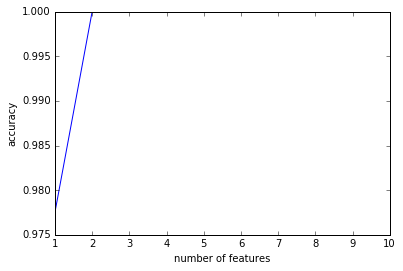

In [3]:
# First, let us consider the performance over a selection of features:

fs = FeatureSelectionClassification()

features, ordered_features, ordered_scores = fs.forward_selection(10, train_X[features_after_chapter_4], train_y)
print ordered_scores
print ordered_features

plot.plot(range(1, 11), ordered_scores)
plot.xlabel('number of features')
plot.ylabel('accuracy')
plot.show()

[0.57303370786516861, 0.51910112359550564, 0.5140449438202247, 0.51011235955056189, 0.5550561797752811, 0.57078651685393267]
[0.6333333333333333, 0.5923076923076922, 0.58974358974358965, 0.57179487179487176, 0.63461538461538447, 0.63717948717948703]


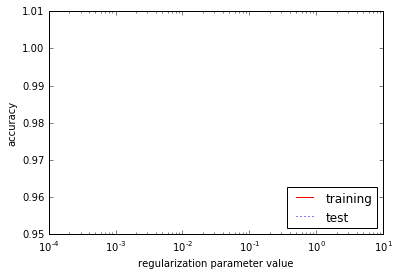

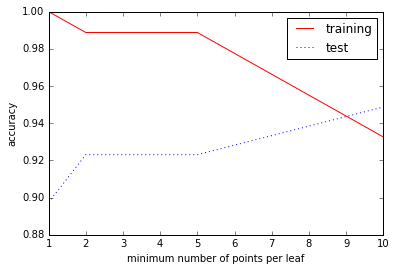

In [4]:


# Based on the plot we select the top 10 features.

# selected_features = ['acc_phone_y_freq_0.0_Hz_ws_40', 'press_phone_pressure_temp_mean_ws_120', 'gyr_phone_x_temp_std_ws_120',
#                      'mag_watch_y_pse', 'mag_phone_z_max_freq', 'gyr_watch_y_freq_weighted', 'gyr_phone_y_freq_1.0_Hz_ws_40',
#                      'acc_phone_x_freq_1.9_Hz_ws_40', 'mag_watch_z_freq_0.9_Hz_ws_40', 'acc_watch_y_freq_0.5_Hz_ws_40']

selected_features = ['gyr_phone_z_freq_0.0_Hz_ws_100', 'step_counter_steps_freq_5.0_Hz_ws_100', 'mag_phone_z_freq_10.0_Hz_ws_100', 'light_phone_lux_freq_7.8_Hz_ws_100', 'acc_phone_x_freq_3.4_Hz_ws_100', 'gyr_phone_x_freq_6.0_Hz_ws_100', 'light_phone_lux_freq_3.6_Hz_ws_100', 'mag_phone_x_freq_6.8_Hz_ws_100', 'mag_phone_z_freq_2.0_Hz_ws_100', 'acc_phone_z_freq_0.4_Hz_ws_100']
# Let us first study the impact of regularization and model complexity: does regularization prevent overfitting?

learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()

reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
performance_training = []
performance_test = []

# We repeat the experiment a number of times to get a bit more robust data as the initialization of the NN is random.

repeats = 20

for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(train_X, train_y,
                                                                                                            test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
                                                                                                            gridsearch=False)
        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/repeats)
    performance_test.append(performance_te/repeats)

plot.hold(True)
plot.semilogx(reg_parameters, performance_training, 'r-')
plot.semilogx(reg_parameters, performance_test, 'b:')
print performance_training
print performance_test
plot.xlabel('regularization parameter value')
plot.ylabel('accuracy')
plot.ylim([0.95, 1.01])
plot.legend(['training', 'test'], loc=4)
plot.hold(False)

plot.show()

# Second, let us consider the influence of certain parameter settings (very related to the regulariztion) and study the impact on performance.

leaf_settings = [1,2,5,10]
performance_training = []
performance_test = []

for no_points_leaf in leaf_settings:
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features], min_samples_leaf=no_points_leaf,
                                                                                               gridsearch=False, print_model_details=False)
    performance_training.append(eval.accuracy(train_y, class_train_y))
    performance_test.append(eval.accuracy(test_y, class_test_y))

plot.hold(True)
plot.plot(leaf_settings, performance_training, 'r-')
plot.plot(leaf_settings, performance_test, 'b:')
plot.xlabel('minimum number of points per leaf')
plot.ylabel('accuracy')
plot.legend(['training', 'test'], loc=1)
plot.hold(False)

plot.show()



In [ ]:

# So yes, it is important :) Therefore we perform grid searches over the most important parameters, and do so by means
# of cross validation upon the training set.


possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4,  selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Selected features']
repeats = 5

scores_over_all_algs = []

for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]

    # First we run our non deterministic classifiers a number of times to average their score.

    performance_tr_nn = 0
    performance_tr_rf = 0
    performance_tr_svm = 0
    performance_te_nn = 0
    performance_te_rf = 0
    performance_te_svm = 0

    for repeat in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_nn += eval.accuracy(train_y, class_train_y)
        performance_te_nn += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_rf += eval.accuracy(train_y, class_train_y)
        performance_te_rf += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_svm += eval.accuracy(train_y, class_train_y)
        performance_te_svm += eval.accuracy(test_y, class_test_y)


    overall_performance_tr_nn = performance_tr_nn/repeats
    overall_performance_te_nn = performance_te_nn/repeats
    overall_performance_tr_rf = performance_tr_rf/repeats
    overall_performance_te_rf = performance_te_rf/repeats
    overall_performance_tr_svm = performance_tr_svm/repeats
    overall_performance_te_svm = performance_te_svm/repeats

    # And we run our deterministic classifiers:


    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_knn = eval.accuracy(train_y, class_train_y)
    performance_te_knn = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_dt = eval.accuracy(train_y, class_train_y)
    performance_te_dt = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(selected_train_X, train_y, selected_test_X)
    performance_tr_nb = eval.accuracy(train_y, class_train_y)
    performance_te_nb = eval.accuracy(test_y, class_test_y)

    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                                (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                                (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                                (performance_tr_knn, performance_te_knn),
                                                                                                (performance_tr_dt, performance_te_dt),
                                                                                                (performance_tr_nb, performance_te_nb)])
    scores_over_all_algs.append(scores_with_sd)

DataViz.plot_performances_classification(['NN', 'RF', 'SVM', 'KNN', 'DT', 'NB'], feature_names, scores_over_all_algs)

# And we study two promising ones in more detail. First let us consider the decision tree which works best with the selected
# features.
#
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True,
                                                                                           print_model_details=True, export_tree_path=export_tree_path)

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True, print_model_details=True)

test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)

DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)


C:\Users\zdujmic\AppData\Local\Continuum\Anaconda2\envs\ml4qs\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
